# Conclusions

 * Need refactoring: GPU memory usage is only 2gb and training goes slow
 * todo: balanced points sampling in batches (pytorch weighted sampler)

# Examples

## Family

In [1]:
import torch
from family_training import FamilyShapeSDFWrapper, load_wrapper_from_dir
from models import SingleShapeSDF
import trimesh
import meshplot

In [2]:
# load model from save dir
wr = load_wrapper_from_dir("e70_l30_b5000_h300_lr0.0001/")

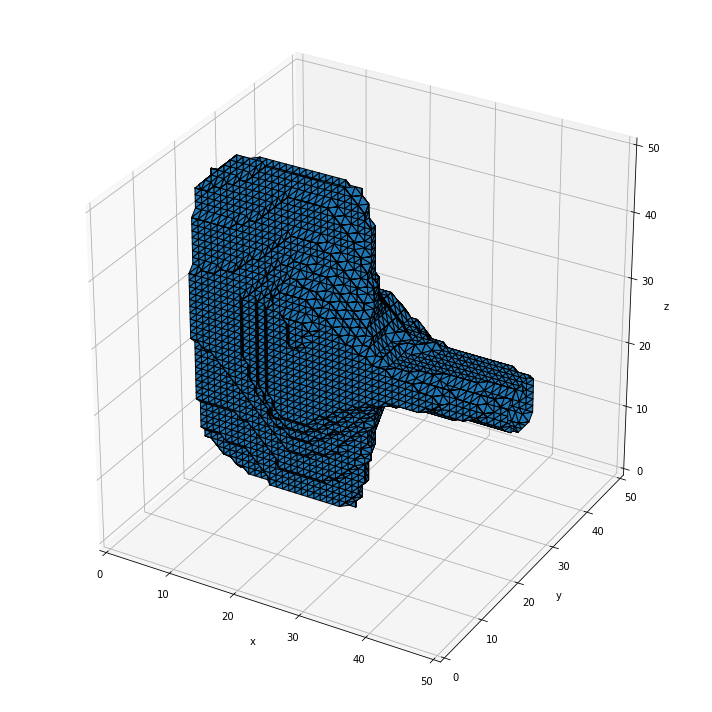

In [3]:
wr.visualize_id_marchingcubes(2)

In [4]:
lat = wr.fit_latent_for_mesh(filepath='data/20.obj', n_epochs=100)

Loading mesh
Sampling points
Optimizing latent
Fit epoch 0, loss 0.20627069822512567
Fit epoch 1, loss 0.19832026632502675
Fit epoch 2, loss 0.19112784578464925
Fit epoch 3, loss 0.18453711038455367
Fit epoch 4, loss 0.1786856921389699
Fit epoch 5, loss 0.1759812906384468
Fit epoch 6, loss 0.1744715259410441
Fit epoch 7, loss 0.1730605938937515
Fit epoch 8, loss 0.171670084586367
Fit epoch 9, loss 0.170229367678985
Fit epoch 10, loss 0.16860459744930267
Fit epoch 11, loss 0.16717322869226336
Fit epoch 12, loss 0.16601144708693027
Fit epoch 13, loss 0.16505605285055935
Fit epoch 14, loss 0.1641457590740174
Fit epoch 15, loss 0.1635026577860117
Fit epoch 16, loss 0.16292016371153295
Fit epoch 17, loss 0.16228533815592527
Fit epoch 18, loss 0.16174858482554555
Fit epoch 19, loss 0.16126123070716858
Fit epoch 20, loss 0.16082712006755173
Fit epoch 21, loss 0.16042674519121647
Fit epoch 22, loss 0.16007309895940125
Fit epoch 23, loss 0.15974075673148036
Fit epoch 24, loss 0.1594314284157008

**Loss** is quite big and reconstruction from the model is far from ideal.
Maybe, the model is not trained enough yet,
so its representation capacity is still limited.

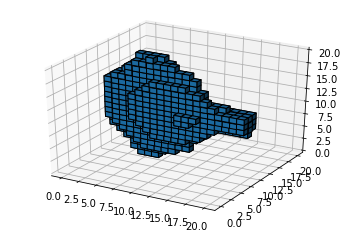

In [5]:
wr.visualize_latent_voxels(lat)

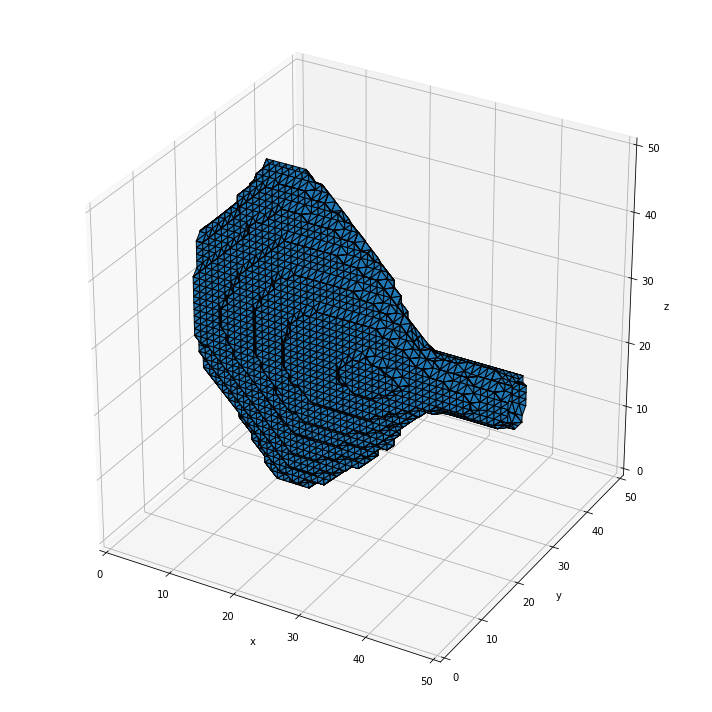

In [6]:
wr.visualize_latent_marchingcubes(lat)

In [7]:
mesh = trimesh.load('data/20.obj')

In [14]:
meshplot.plot(mesh.vertices, mesh.faces)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.0,…

## Single Shape

In [10]:
from test_fnn import visualize_marchingcubes, visualize_voxels

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SingleShapeSDF([512, 512, 512]).to(device)

In [12]:
model.load_state_dict(torch.load("SingleShapeSDF-512.pt"))

<All keys matched successfully>

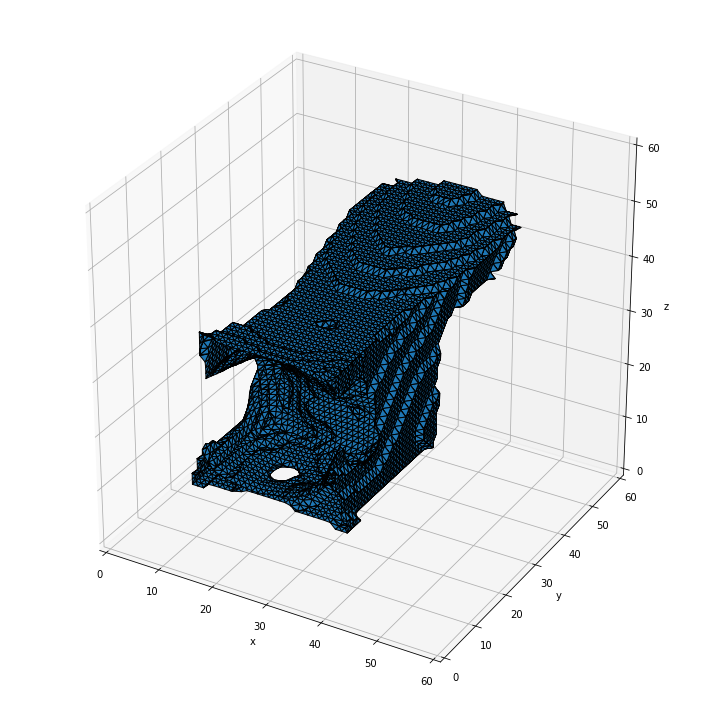

In [13]:
visualize_marchingcubes(model)